# TDT4136 - Assignment 3
## Constraint Satisfaction Problems
### 1 - Import our implementation

In [1]:
import Assignment as a

### 2 - Test our implementation on map colouring problem

In [2]:
coloring_map = a.create_map_coloring_csp()
result = coloring_map.backtracking_search()
print(result)

{'WA': ['red'], 'NT': ['green'], 'Q': ['red'], 'NSW': ['green'], 'V': ['red'], 'SA': ['blue'], 'T': ['red']}


### 3 - Solve different sudoku boards

In [3]:
from pathlib import Path

sudokus = Path('').glob('*.txt')

for sudoku_file in sudokus:
    print(sudoku_file)
    sudoku = a.create_sudoku_csp(sudoku_file)
    solution = sudoku.backtracking_search()
    a.print_sudoku_solution(solution)

    print(f"\nNumber of backtrack function calls: {sudoku.number_of_calls}")
    print(f"Number of backtrack function failures: {sudoku.number_of_fails}")
    print('---------------------\n')

medium.txt
8 7 5 | 9 3 6 | 1 4 2 
1 6 9 | 7 2 4 | 3 8 5 
2 4 3 | 8 5 1 | 6 7 9 
------+-------+------
4 5 2 | 6 9 7 | 8 3 1 
9 8 6 | 4 1 3 | 2 5 7 
7 3 1 | 5 8 2 | 9 6 4 
------+-------+------
5 1 7 | 3 6 9 | 4 2 8 
6 2 8 | 1 4 5 | 7 9 3 
3 9 4 | 2 7 8 | 5 1 6 

Number of backtrack function calls: 3
Number of backtrack function failures: 0
---------------------

hard.txt
1 5 2 | 3 4 6 | 8 9 7 
4 3 7 | 1 8 9 | 6 5 2 
6 8 9 | 5 7 2 | 3 1 4 
------+-------+------
8 2 1 | 6 3 7 | 9 4 5 
5 4 3 | 8 9 1 | 7 2 6 
9 7 6 | 4 2 5 | 1 8 3 
------+-------+------
7 9 8 | 2 5 3 | 4 6 1 
3 6 5 | 9 1 4 | 2 7 8 
2 1 4 | 7 6 8 | 5 3 9 

Number of backtrack function calls: 12
Number of backtrack function failures: 4
---------------------

veryhard.txt
4 3 1 | 8 6 7 | 9 2 5 
6 5 2 | 4 9 1 | 3 8 7 
8 9 7 | 5 3 2 | 1 6 4 
------+-------+------
3 8 4 | 9 7 6 | 5 1 2 
5 1 9 | 2 8 4 | 7 3 6 
2 7 6 | 3 1 5 | 8 4 9 
------+-------+------
9 4 3 | 7 2 8 | 6 5 1 
7 6 5 | 1 4 3 | 2 9 8 
1 2 8 | 6 5 9 | 4 7 3 

Number

### 4 - Look at the arc-consistency at the beginning and possibilities

In [4]:
import copy
import numpy as np

sudokus_ordered_by_difficulty = ['easy.txt', 'medium.txt', 'hard.txt', 'veryhard.txt']

y = []
possibilities_table_ = {}
for board in sudokus_ordered_by_difficulty:
        not_solved_sudoku = a.create_sudoku_csp(board)
        assignment = copy.deepcopy(not_solved_sudoku.domains)
        
        not_solved_sudoku.inference(assignment, not_solved_sudoku.get_all_arcs())

        possibilities_table_[board] = [ [len(assignment[f"{i}-{j}"]) for i in range(9)] for j in range(9)]
        y.append(np.prod(np.array(possibilities_table_[board])))

        print('board:', board)
        print('total possibilities:', np.prod(np.array(possibilities_table_[board])))
        print('mean possibilities:', np.mean(np.array(possibilities_table_[board])), end='\n\n')



board: easy.txt
total possibilities: 1
mean possibilities: 1.0

board: medium.txt
total possibilities: 3439853568
mean possibilities: 1.4567901234567902

board: hard.txt
total possibilities: 148618787703226368
mean possibilities: 2.432098765432099

board: veryhard.txt
total possibilities: 8036474935754883072
mean possibilities: 2.753086419753086



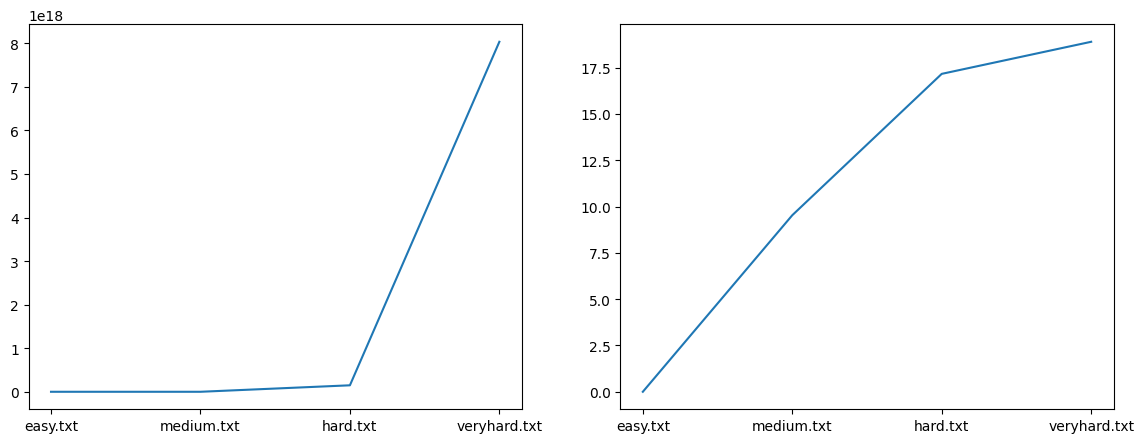

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
plt.plot(sudokus_ordered_by_difficulty, y)
plt.subplot(1,2,2)
plt.plot(sudokus_ordered_by_difficulty, np.log10(y))
plt.show()

### 5 - Look at the boards complexity

In [6]:
sudokus_ordered_by_difficulty = ['easy.txt', 'medium.txt', 'hard.txt', 'veryhard.txt']

for board_file in sudokus_ordered_by_difficulty:
    print('Board difficulty:', board_file)
    board = list(map(lambda x: x.strip(), open(board_file, 'r')))
    k = 0
    for row in board: 
        for col in row: 
            if col == '0': k += 1
    print('Number of empty cells:', k, '\n')

Board difficulty: easy.txt
Number of empty cells: 49 

Board difficulty: medium.txt
Number of empty cells: 48 

Board difficulty: hard.txt
Number of empty cells: 53 

Board difficulty: veryhard.txt
Number of empty cells: 55 



In [7]:
sudokus = Path('').glob('*.txt')

number_of_keys = {}

constraints_possible_lengths = {}

number_of_constraints_with_length_ = {}
current_constraints_with_length_ = {}
last_number_of_constraints_with_length_ = {}
is_always_same_number_of_constraints_for_length_ = {}
total_number_of_constraints = {}

for board in sudokus:
    print(board, end='\n\n')
    board_difficulty = str(board)
    number_of_keys[board_difficulty] = 0

    constraints_possible_lengths[board_difficulty] = []

    number_of_constraints_with_length_[board_difficulty] = {}
    current_constraints_with_length_[board_difficulty] = {}
    last_number_of_constraints_with_length_[board_difficulty] = {}
    is_always_same_number_of_constraints_for_length_[board_difficulty] = {}
    
    not_solved_sudoku = a.create_sudoku_csp(board)
    for key, value in not_solved_sudoku.constraints.items():
        number_of_keys[board_difficulty] += 1

        for constraint_key, constraint_value in value.items():
            if len(constraint_value) in constraints_possible_lengths[board_difficulty]:
                current_constraints_with_length_[board_difficulty][len(constraint_value)] += 1
            else: 
                constraints_possible_lengths[board_difficulty].append(len(constraint_value))
                current_constraints_with_length_[board_difficulty][len(constraint_value)] = 1
                number_of_constraints_with_length_[board_difficulty][len(constraint_value)] = 0
                last_number_of_constraints_with_length_[board_difficulty][len(constraint_value)] = 0
                is_always_same_number_of_constraints_for_length_[board_difficulty][len(constraint_value)] = True

        for constraint_length in constraints_possible_lengths[board_difficulty]:
            number_of_constraints_with_length_[board_difficulty][constraint_length] += current_constraints_with_length_[board_difficulty][constraint_length]
            is_always_same_number_of_constraints_for_length_[board_difficulty][constraint_length] = is_always_same_number_of_constraints_for_length_[board_difficulty][constraint_length] * (last_number_of_constraints_with_length_[board_difficulty][constraint_length] == current_constraints_with_length_[board_difficulty][constraint_length]) if last_number_of_constraints_with_length_[board_difficulty][constraint_length] != 0 else True

            last_number_of_constraints_with_length_[board_difficulty][constraint_length] = current_constraints_with_length_[board_difficulty][constraint_length]
            current_constraints_with_length_[board_difficulty][constraint_length] = 0


    print('number of keys:', number_of_keys[board_difficulty], end='\n\n')

    total_number_of_constraints[board_difficulty] = 0
    constraints_possible_lengths[board_difficulty].sort()
    for constraint_length in constraints_possible_lengths[board_difficulty]:
        print('Constraint length:', constraint_length)
        print(f'Number of constraints with a length of {constraint_length}:', number_of_constraints_with_length_[board_difficulty][constraint_length])

        print(f'Always same length for constraint with a length of {constraint_length}:', bool(is_always_same_number_of_constraints_for_length_[board_difficulty][constraint_length]))
        print('Size is always:', last_number_of_constraints_with_length_[board_difficulty][constraint_length]) if bool(is_always_same_number_of_constraints_for_length_[board_difficulty][constraint_length]) else print('Last length was:', last_number_of_constraints_with_length_[board_difficulty][constraint_length])
        total_number_of_constraints[board_difficulty] += number_of_constraints_with_length_[board_difficulty][constraint_length]

        print('\n')
    
    print('Total number of constraints for this board:', total_number_of_constraints[board_difficulty])
    print('\n---------------------\n')

medium.txt

number of keys: 81

Constraint length: 1
Number of constraints with a length of 1: 252
Always same length for constraint with a length of 1: True
Size is always: 0


Constraint length: 8
Number of constraints with a length of 8: 816
Always same length for constraint with a length of 8: False
Last length was: 5


Constraint length: 72
Number of constraints with a length of 72: 552
Always same length for constraint with a length of 72: False
Last length was: 15


Total number of constraints for this board: 1620

---------------------

hard.txt

number of keys: 81

Constraint length: 1
Number of constraints with a length of 1: 172
Always same length for constraint with a length of 1: True
Size is always: 7


Constraint length: 8
Number of constraints with a length of 8: 776
Always same length for constraint with a length of 8: False
Last length was: 13


Constraint length: 72
Number of constraints with a length of 72: 672
Always same length for constraint with a length of 72: 

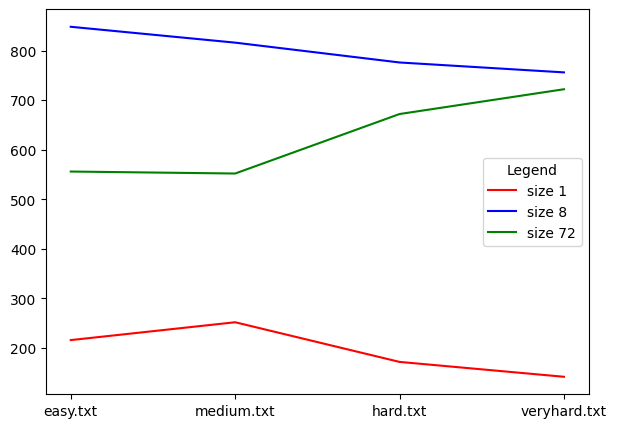

In [8]:
import matplotlib.pyplot as plt

sudokus_ordered_by_difficulty = ['easy.txt', 'medium.txt', 'hard.txt', 'veryhard.txt']

colors = ['red', 'blue', 'green']

constraint_lengths = []
for difficulty in sudokus_ordered_by_difficulty:
    for constraints_possible_length in constraints_possible_lengths[difficulty]:
        if not any(constraints_possible_length in tup for tup in constraint_lengths):
            constraint_lengths.append((constraints_possible_length, colors[0]))
            colors.pop(0)

y = { elem: [] for elem, _ in constraint_lengths }
total_constraints_values_in_ = { difficulty: 0 for difficulty in sudokus_ordered_by_difficulty }
plt.figure(figsize=(7, 5))

for elem, color in constraint_lengths:
    for difficulty in sudokus_ordered_by_difficulty:
        y[elem].append(number_of_constraints_with_length_[difficulty][elem])
        total_constraints_values_in_[difficulty] += elem * number_of_constraints_with_length_[difficulty][elem]
    plt.plot(sudokus_ordered_by_difficulty, y[elem], label=f"size {elem}", color=color)

plt.legend(loc='center right', title='Legend')
plt.show()

In [9]:
total_constraints_values_in_

{'easy.txt': 47032,
 'medium.txt': 46524,
 'hard.txt': 54764,
 'veryhard.txt': 58174}

board: easy.txt
eijk: 108

board: medium.txt
eijk: 112

board: hard.txt
eijk: 128

board: veryhard.txt
eijk: 148



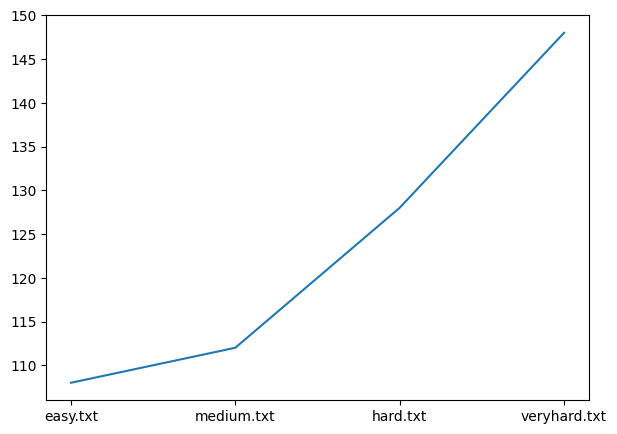

In [10]:
e_ = { b: [[ 0 for _ in range(9)] for _ in range(9)] for b in sudokus_ordered_by_difficulty}

for board in sudokus_ordered_by_difficulty:
    not_solved_sudoku = a.create_sudoku_csp(board)

    for key, value in not_solved_sudoku.constraints.items():
        ik, jk = int(key[0]), int(key[2])
        for constraint_key, constraint_values in value.items():
            i, j = int(constraint_key[0]), int(constraint_key[2])

            if len(constraint_values) == 72 and i != ik and j != jk:
                e_[board][ik][jk] += 1

y = []
for board in sudokus_ordered_by_difficulty:
    print('board:', board)
    print('eijk:', np.sum(np.array(e_[board])), end='\n\n')
    y.append(np.sum(np.array(e_[board])))

plt.figure(figsize=(7,5))
plt.plot(sudokus_ordered_by_difficulty, y)
